In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./data/all_and_classification.csv')
data = data.drop('file_name', axis=1)
data = data.drop('run', axis=1)
data['forks'] = data['forks'].replace(['steady state'], 1)
data['forks'] = data['forks'].replace(['no steady state'], 0)
data = data.loc[data['forks'] == 1]
data = data.drop('forks', axis=1)
x_data = data.drop('steady_state_starts', axis=1)
y_data = data['steady_state_starts']

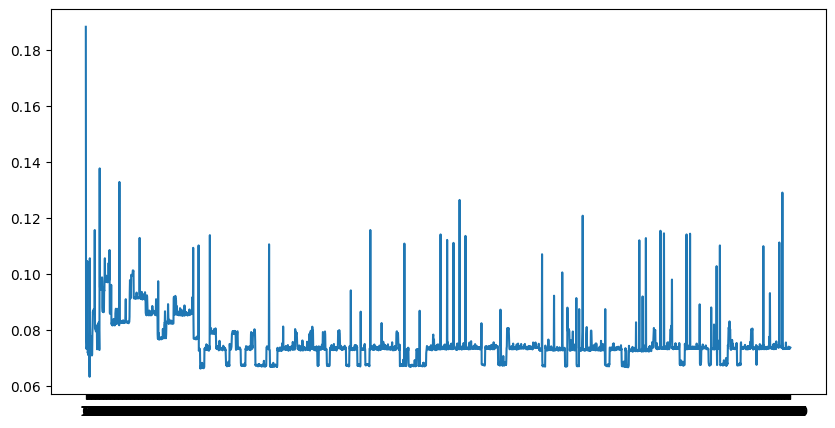

In [48]:

plt.figure(figsize=(10,5))
plt.plot(x_data.iloc[1])


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [4]:
# Multiplicative Decomposition
mul_result = seasonal_decompose(x_data.iloc[0:1], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(x_data.iloc[0,:], model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

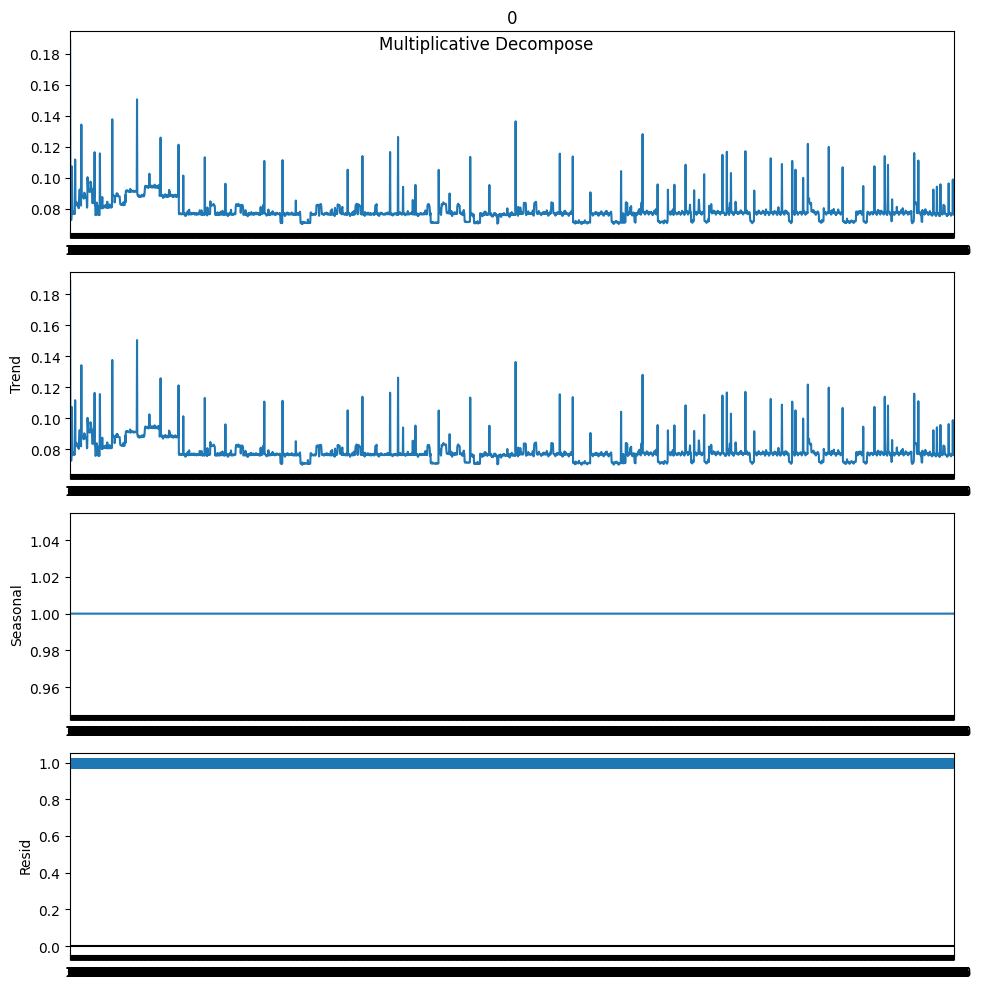

In [5]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

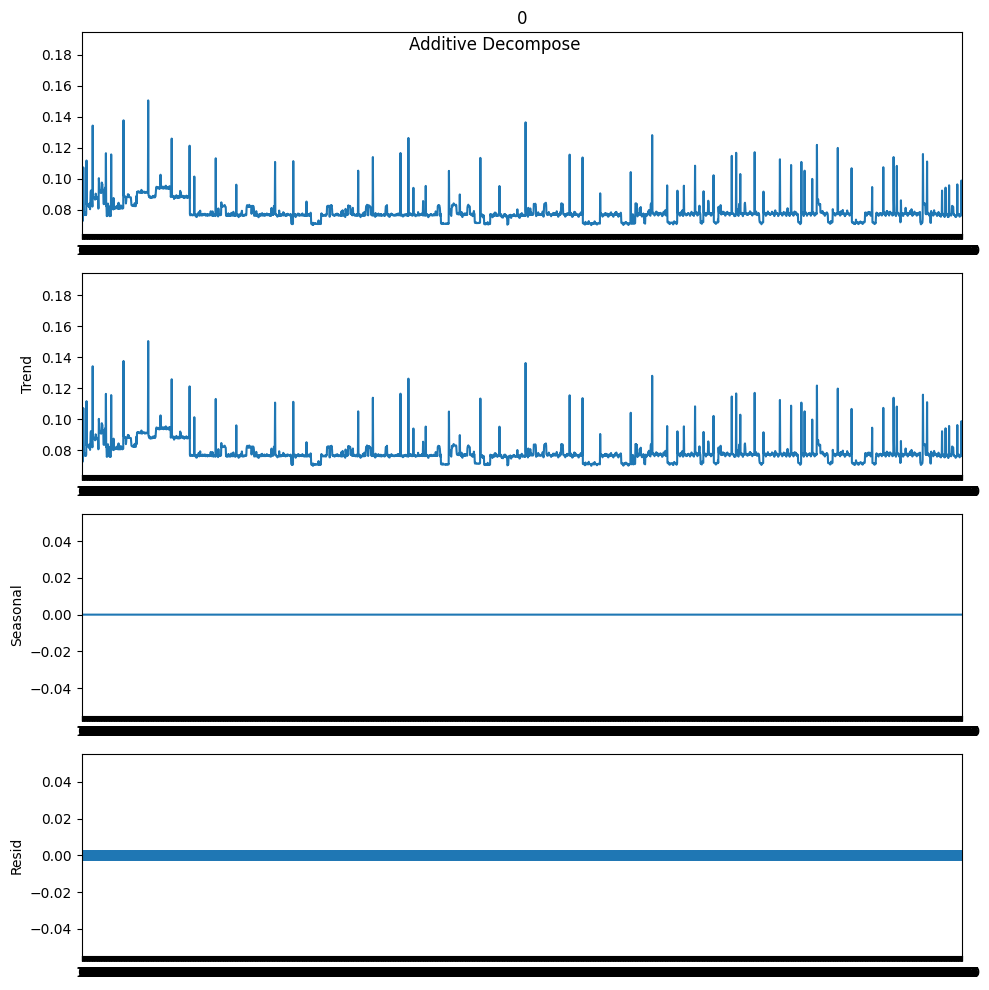

In [6]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller

# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
for i in range(10, 3000, 100):
    adfuller_result = adfuller(x_data.iloc[1][0:i], autolag='AIC')
    # print(f'p-value: {adfuller_result[1]}')

    if not adfuller_result[1] <0.05:
        print("not stationary", i)
#
# print(f'ADF Statistic: {adfuller_result[0]}')
#
# print(f'p-value: {adfuller_result[1]}')
#
# if adfuller_result[1] <0.05:
#     print("stationary")
# else:
#     print("not stationary")
#
# for key, value in adfuller_result[4].items():
#     print('Critial Values:')
#     print(f'   {key}, {value}')

not stationary 110
not stationary 610
not stationary 810
not stationary 1010
not stationary 1110
not stationary 1210
not stationary 1310
not stationary 1410
not stationary 1510
not stationary 1710
not stationary 1810
not stationary 1910
not stationary 2010


In [29]:
x_data.iloc[0][0:100]

0     0.188482
1     0.075366
2     0.073728
3     0.072942
4     0.072614
        ...   
95    0.076022
96    0.075760
97    0.076087
98    0.076349
99    0.075891
Name: 0, Length: 100, dtype: float64

In [46]:
y_data.iloc[1]

480

In [11]:
from statsmodels.tsa.stattools import acf, pacf
ACF_lag= acf(x_data.iloc[1], nlags=3000)

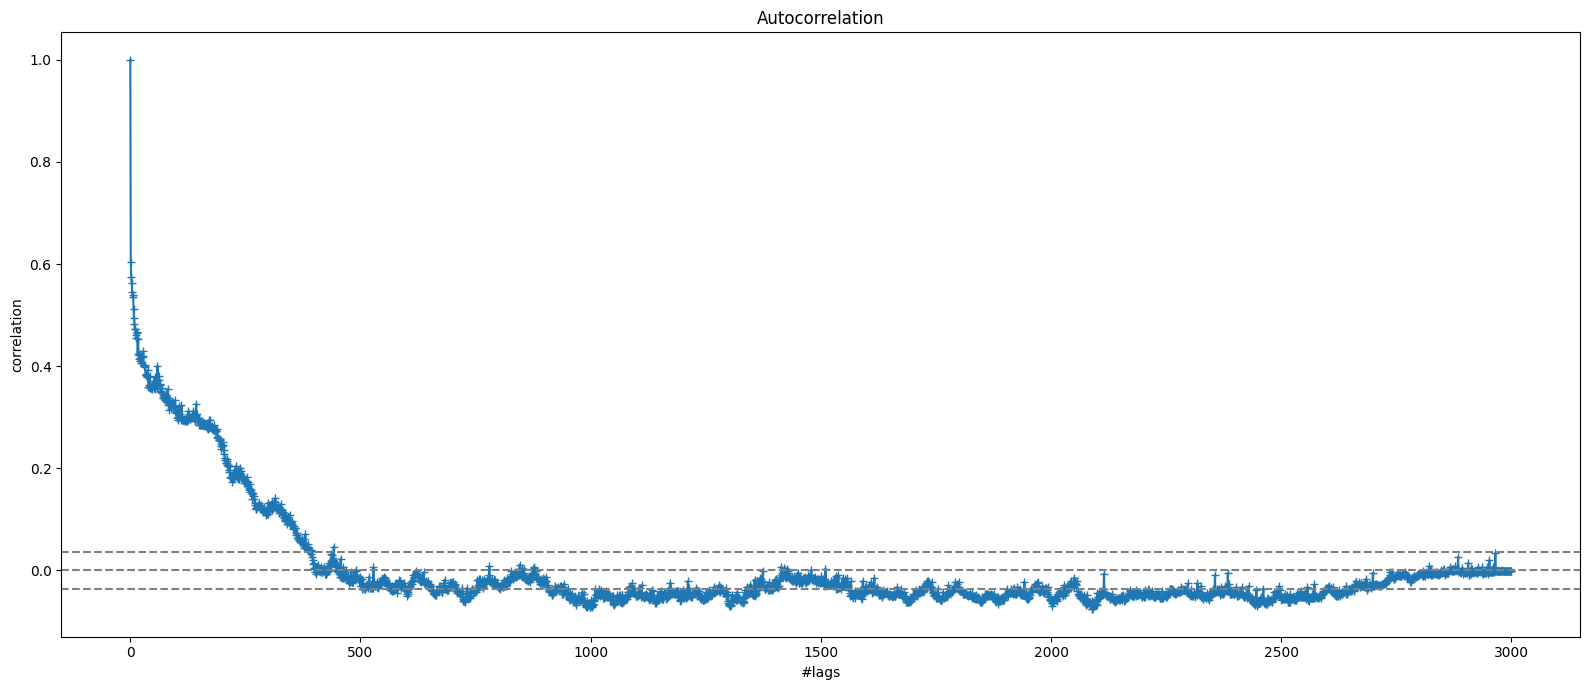

In [12]:
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_data.iloc[1])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_data.iloc[1])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

In [15]:
#calling partial correlation function
PACF_lag = pacf(x_data.iloc[1], nlags=1499, method='ols')

#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_data.iloc[1])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_data.iloc[1])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

KeyboardInterrupt: 

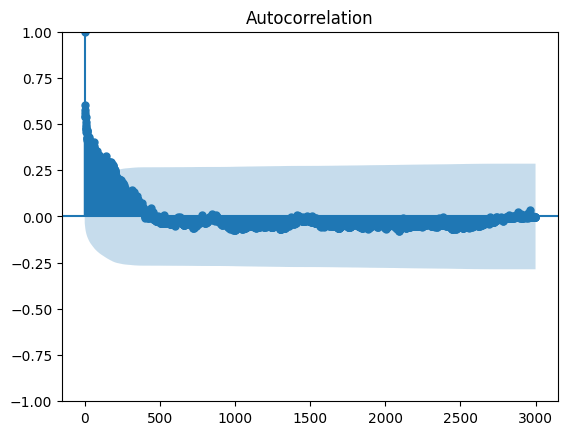

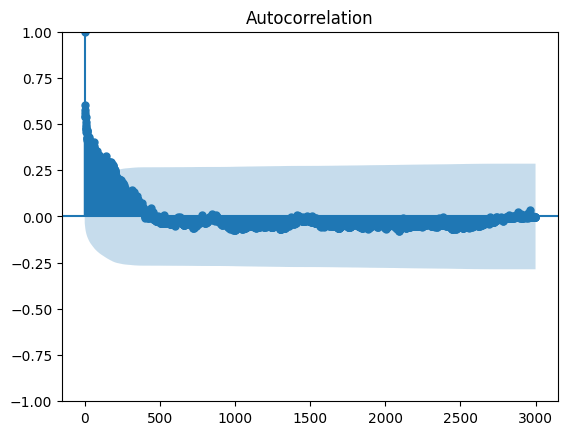

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x_data.iloc[1], lags = 2999)

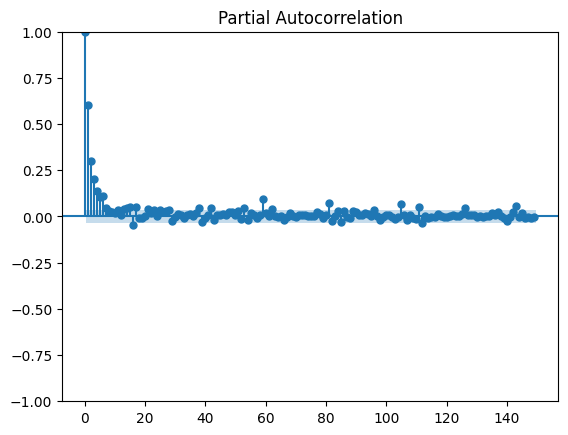

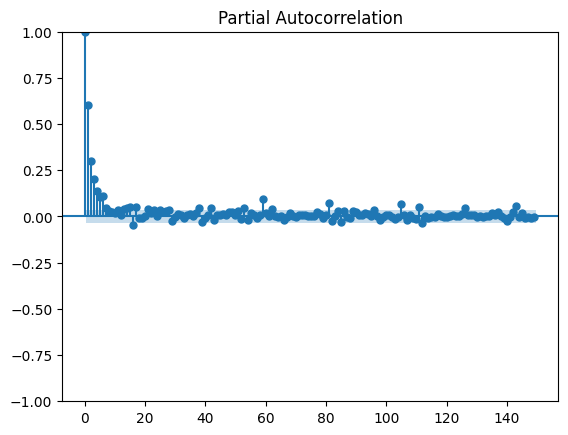

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(x_data.iloc[1], lags = 149, method = "ols")
